# Proyecto 11
Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
Crear un modelo para predecir el volumen de reservas en pozos nuevos.
Elegir los pozos petrolíferos que tienen los valores estimados más altos.
Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

Condiciones:
Solo se debe usar la regresión lineal para el entrenamiento del modelo.
Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

## 1.-Visualizacion de Datos

In [2]:
#Examinar los datos
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#Leer los datasets
data_1 = pd.read_csv('geo_data_0.csv')
data_2 = pd.read_csv('geo_data_1.csv')
data_3 = pd.read_csv('geo_data_2.csv')

In [4]:
#Mostrar informacion
def info_data(datos):
    print('Primeras Filas')
    print(datos.head())
    print('Informacion General')
    print(datos.info())
    print('Datos nulos')
    print(datos.isna().sum())
    print('Datos Duplicados')
    print(datos.duplicated().sum())
    print(datos.describe())

In [5]:
#Visualizacion de datos
info_data(data_1)

Primeras Filas
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Datos nulos
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Datos Duplicados
0
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.0

In [6]:
info_data(data_2)

Primeras Filas
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Datos nulos
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Datos Duplicados
0
                  f0             f1             f2        product
count  100000.000000  100000.0000

In [7]:
info_data(data_3)

Primeras Filas
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Datos nulos
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Datos Duplicados
0
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.0

In [8]:
# Crear una funcion para ver las distribuciones
def distribuciones(data):

    columnas= list(data.columns[1:])
    plt.subplots(figsize=[20,5])
    for indice, columna in enumerate(columnas):
        grafico =sns.histplot(data, x=columna, bins=50, ax=plt.subplot(1, len(columnas), indice + 1))
        plt.xticks(rotation = 45)

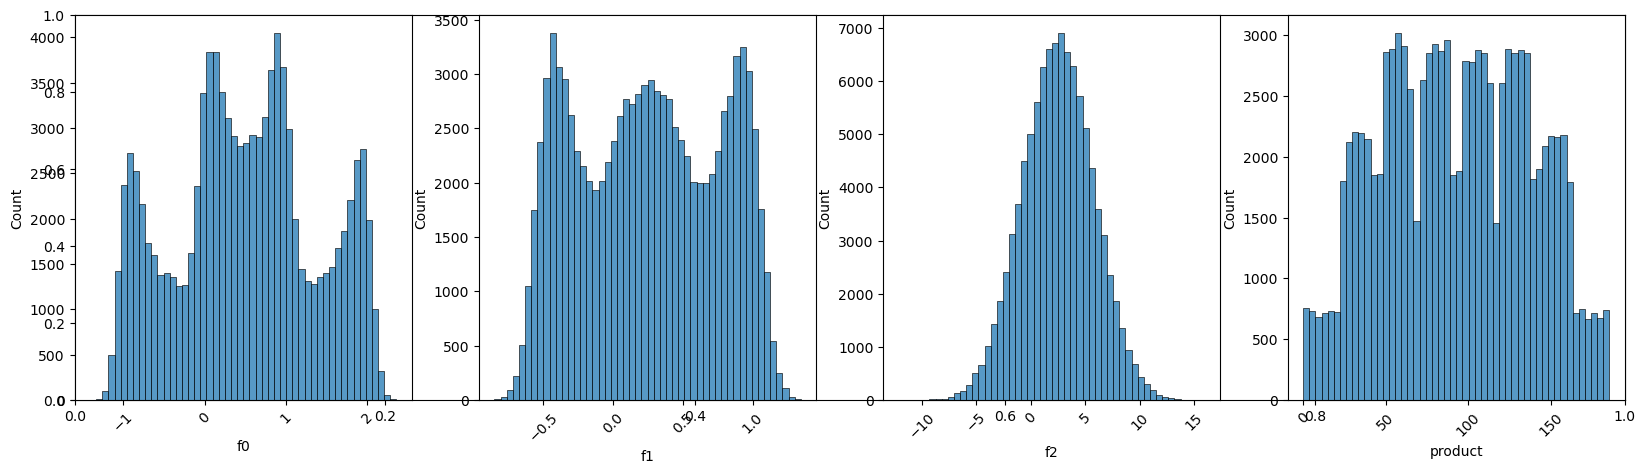

In [9]:
distribuciones(data_1)

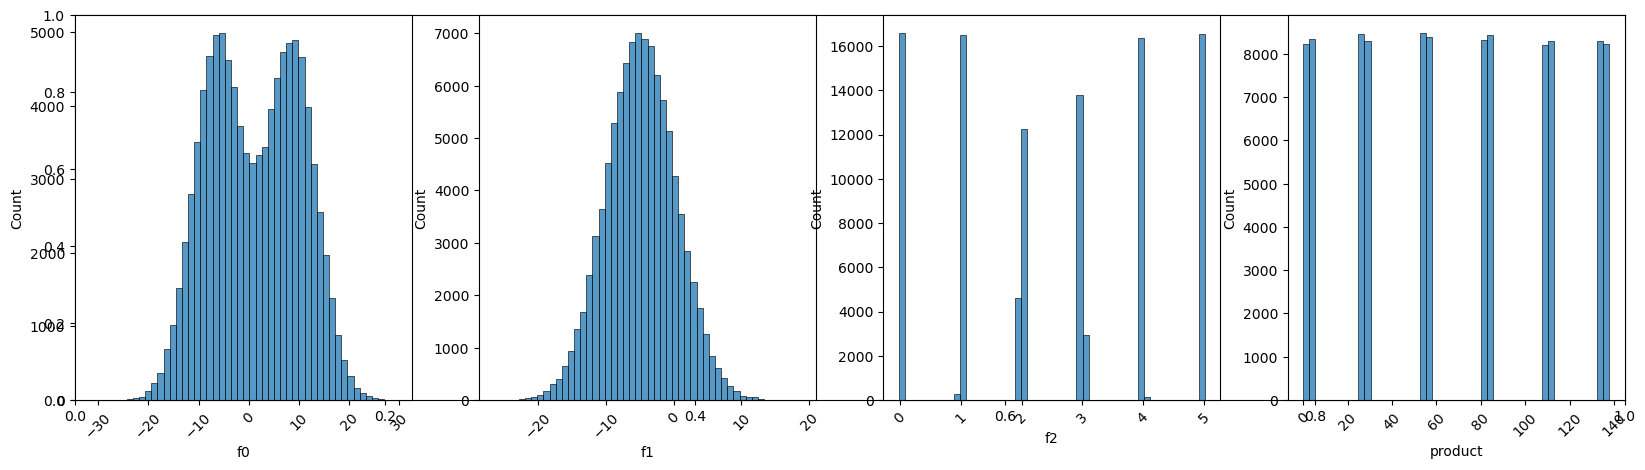

In [10]:
distribuciones(data_2)

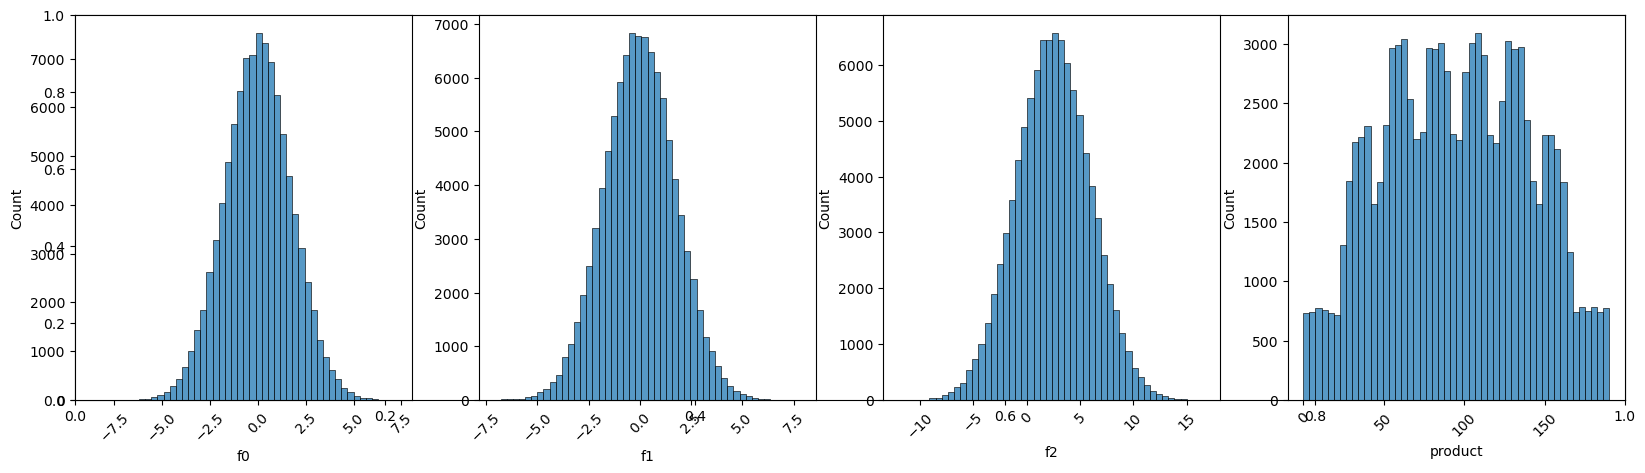

In [11]:
distribuciones(data_3)

### Observaciones
Cada region tiene un comportamiento diferente, en la Region 2 en la f2 y producto hay una distribucion discreta a diferencia del resto de regiones que tienen una distribucion normal.  

In [12]:
# Ver correlacion entre las caracteristicas con su variable objetivo
def correlacion(data):

    columnas= list(data.columns[1:-1])
    
    for indice, columna in enumerate(columnas):
        fig, ax= plt.subplots()
        ax.scatter(data[columna], data['product'])
        plt.title('Dispercion')
        plt.xlabel(columna)
        plt.ylabel('Producto')
        plt.show()

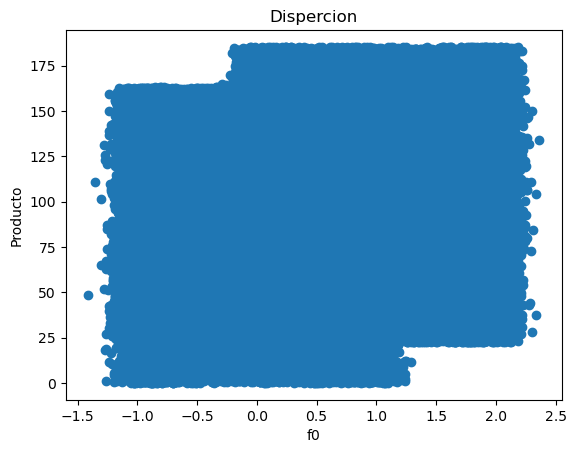

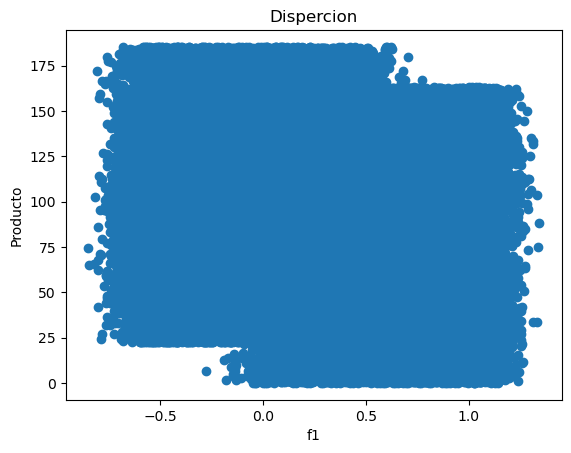

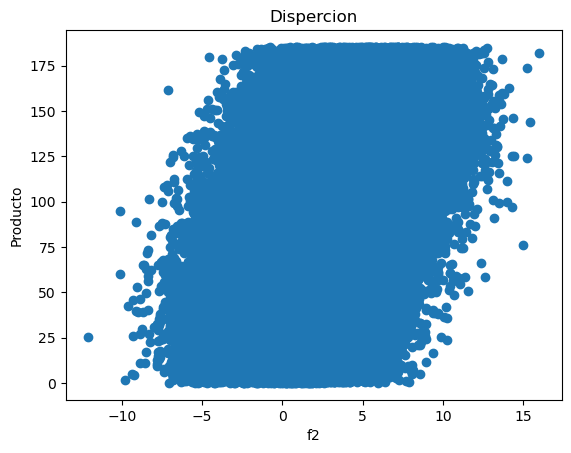

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


In [13]:
correlacion(data_1)
print(data_1.iloc[:,1:].corr())

### Observaciones
La Region 1 en correlacion del f2 con el producto es un correlacion positiva y el resto f0 y f1 tienen una correlacion directa.  

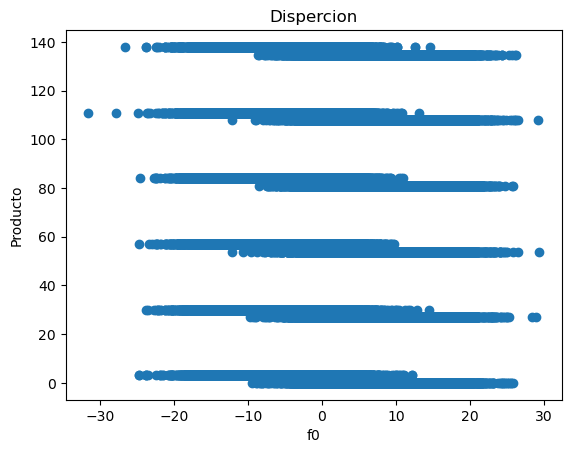

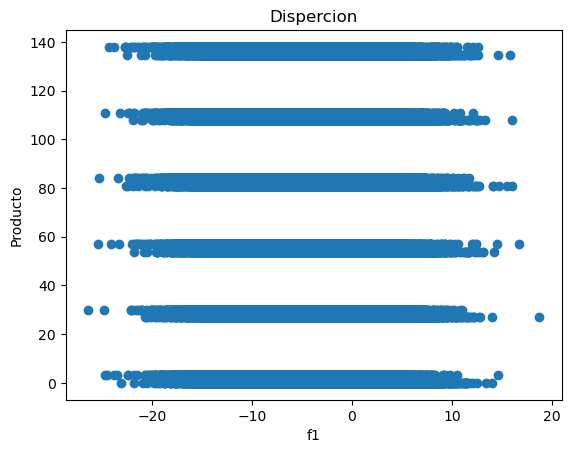

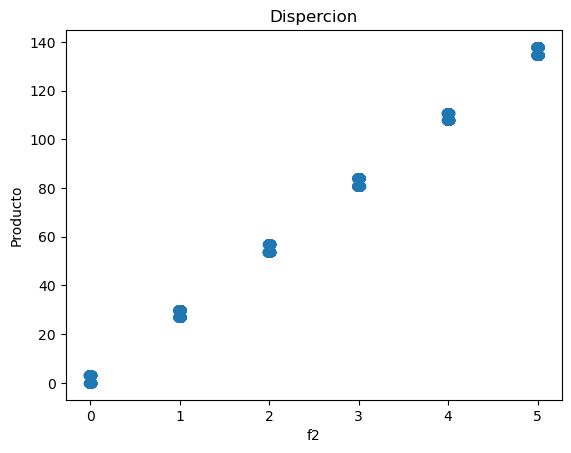

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


In [14]:
correlacion(data_2)
print(data_1.iloc[:,1:].corr())

### Observaciones
En la Region 2 la f2 tiene un correlacion positiva porque mientras una variable crece la otra crece, el resto f0 y f1 tienen un correlacion nula. 

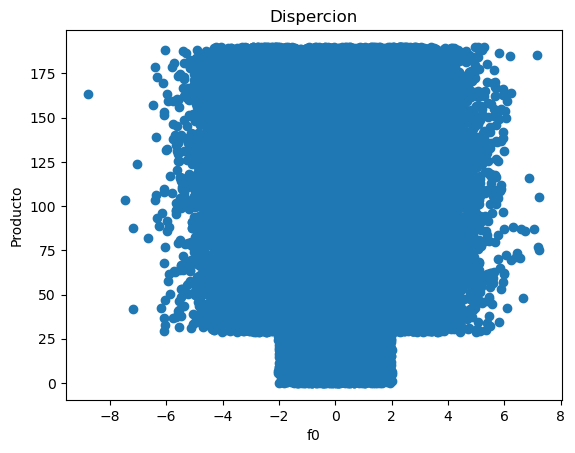

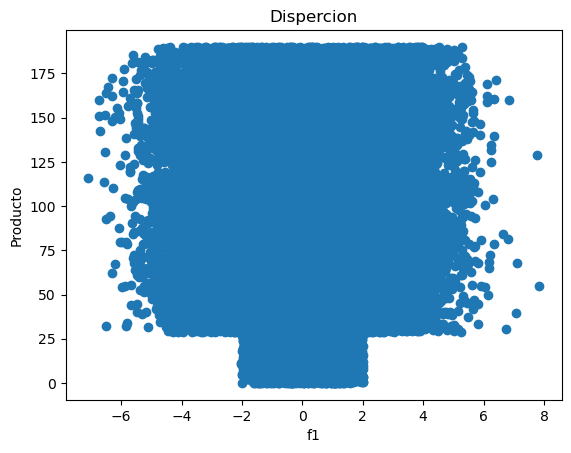

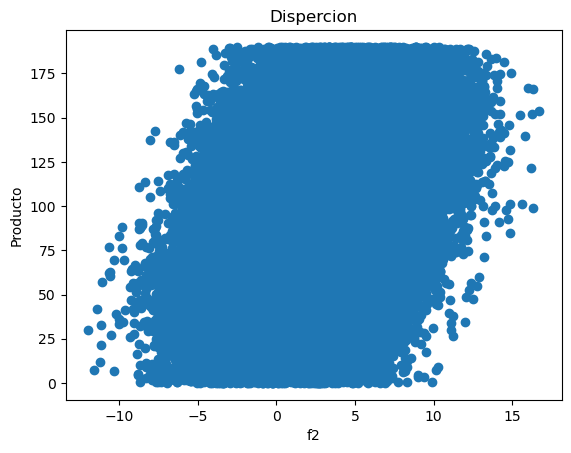

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


In [15]:
correlacion(data_3)
print(data_1.iloc[:,1:].corr())

### Observaciones
En el caso de la Region 3 , en el f2 igualmente tiene una correlacion positiva , mientras que el f0 y f1 tienen valores dispersos.

## 2. Modelo de Prediccion

In [16]:
# Eliminar la columna id que no es necesaria para el entrenamiento del modelo
data_1_clean = data_1.drop(columns=['id'], axis=1)
data_2_clean = data_2.drop(columns=['id'], axis=1)
data_3_clean = data_3.drop(columns=['id'], axis=1)

In [17]:
#Crear la variable state  
state = np.random.RandomState(54321)

In [18]:
# Crear una funcion para entrenar un modelo de Regresion Lineal 
def train(data, state):
     #Separamos los datos de las caracteristicas 
    caracteristicas= data.drop(columns=['product'], axis=1)
    objetivo= data['product']
    # Dividimos los datos de entrenamiento y prueba 
    caracteristicas_train, caracteristicas_test, objetivo_train, objetivo_test = train_test_split(caracteristicas, objetivo, test_size=0.25, random_state =state)
    #Crear el modelo 
    model_rl = LinearRegression()
    model_rl.fit(caracteristicas_train, objetivo_train)
    #Realizar la prediccion 
    prediccion = model_rl.predict(caracteristicas_test)
    # Establecer la raiz del error Cuadrico Medio 
    rmse = np.sqrt(mean_squared_error(objetivo_test, prediccion))
    print('RMSE', rmse)
    print('Volumen de barriles promedio prediccion: ', prediccion.mean())
    resultado= pd.DataFrame(dict(prediccion_valores = prediccion, valor_real = objetivo_test))
    return resultado 

In [19]:
# Establecer las variables para hacer la prediccion por region 
regiones= ['Region 1', 'Region 2', 'Region 3']
datos=[data_1_clean, data_2_clean, data_3_clean]
predict_region ={}

In [20]:
for data, region in zip(datos, regiones):
    predict_region[region] = train(data, state)

RMSE 37.68341093860808
Volumen de barriles promedio prediccion:  92.15921155743655
RMSE 0.8885222400411976
Volumen de barriles promedio prediccion:  68.88432201515047
RMSE 40.136726733973994
Volumen de barriles promedio prediccion:  95.17807449209


In [21]:
predict_region

{'Region 1':        prediccion_valores  valor_real
 47590          110.101190   96.485709
 39469          122.700895  155.642351
 88291           84.023603   78.784777
 46565           95.975692  120.530381
 55316           83.437307   99.818807
 ...                   ...         ...
 27645          121.352066  157.240437
 57064          107.131396  143.443160
 73541           97.346248  117.909556
 10466          131.189324  130.134401
 14296          112.040388  128.887513
 
 [25000 rows x 2 columns],
 'Region 2':        prediccion_valores  valor_real
 14659            3.400360    3.179103
 91053           56.352065   57.085625
 57960           56.093832   57.085625
 13247           27.939544   30.132364
 32713           81.275973   80.859783
 ...                   ...         ...
 67274          138.654853  137.945408
 50689           54.556852   53.906522
 65130           54.277772   53.906522
 41863           80.867665   80.859783
 93742          109.849964  110.992147
 
 [25000 r

## 3. Evaluacion Financiera 

In [77]:
#Establecer los datos propuestos
presupuesto= 100000000
income= 4500
pozos= 200

In [79]:
#Definir el  volumen minimo que se deben extraer de la region 
volumen_minimo= presupuesto/income

In [81]:
volumen_minimo

22222.222222222223

In [198]:
# Definir el volumen minmo que se debe sacar por el pozo 
volumen_minimo_por_pozo = volumen_minimo/pozos

In [85]:
volumen_minimo_por_pozo

111.11111111111111

In [200]:
# Funcion para calcular el beneficio de cada region 
def beneficio(datos):

    mejores_lugares = datos.sort_values(by='prediccion_valores', ascending= False)['valor_real'].head(200)
    
    volumen_mejores_lugares = mejores_lugares.sum()
    
    margen= ((volumen_mejores_lugares*income) - presupuesto)
    return margen

In [202]:
beneficio(predict_region['Region 1'])

31786315.95503962

In [204]:
beneficio(predict_region['Region 2'])

24150866.966815114

In [206]:
beneficio(predict_region['Region 3'])

24810535.044288725

### Observaciones 
La region 1 es la mejor en ganancias.

In [159]:
#Escoger 500 ubicaciones al azar de la region de las cuales se saca las mejores 200, modelo bootstrapping 
def modelo_riesgo(datos, n_muestras= 1000):
    
    beneficio_muestra=[]
    
    for muestra in range(n_muestras):
        ubicaciones = datos.sample(n=500,replace=True, random_state=state)
        beneficio_muestra.append(beneficio(ubicaciones))
        
    beneficio_muestra = pd.Series(beneficio_muestra)
    
    return beneficio_muestra

In [161]:
modelo_riesgo(predict_region['Region 1'])

0      5.120833e+06
1      4.280153e+06
2      3.768244e+06
3      1.137115e+06
4      3.619180e+06
           ...     
995    3.675136e+05
996    2.445120e+05
997    2.211624e+06
998    2.623704e+06
999    1.380984e+06
Length: 1000, dtype: float64

In [208]:
# Funcion para evaluar la metricas de cada region 
def metricas(beneficio_muestras, region):

    nivel_confianza=0.95
    alpha= 1 - nivel_confianza
    
    beneficio_promedio= beneficio_muestras.mean()
    
    perdida = beneficio_muestras[beneficio_muestras < 0].mean()

    print('Las metricas de la region:',region)
    print('Ganancia promedio:', beneficio_promedio)
    print('Perdida promedio:', perdida)
    print('------------------------------')

In [169]:
# Bucle que itere en cada region para visualizar las ganancias y perdidas promedio por region. 
for region, data in predict_region.items():
    margen_region=modelo_riesgo(data)
    metricas(margen_region, region)

Las metricas de la region: Region 1
Ganancia promedio: 3862604.311488867
Perdida promedio: -1053211.720655029
------------------------------
Las metricas de la region: Region 2
Ganancia promedio: 4309349.087444576
Perdida promedio: -1055082.2756766528
------------------------------
Las metricas de la region: Region 3
Ganancia promedio: 3097526.0464213598
Perdida promedio: -1316871.3680121643
------------------------------


## Conclusiones
La region con mas Ganancia es la Region 2 pero la Region con menor perdida es la Region 1, se podria concluir que la Region 2 que tiene la ganacia mas alta pero que no arriesga mucho en la perdida en relacion que la region 1. 

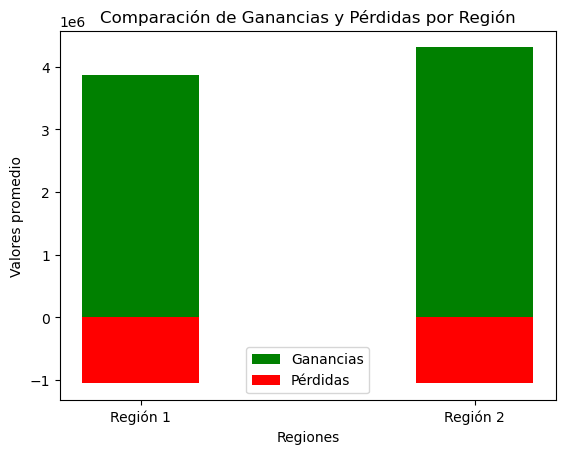

In [213]:
#Visualizar la evaluacion en comparacion entre la Region 1 y 2 
import matplotlib.pyplot as plt

# Datos
regiones = ['Región 1', 'Región 2']
ganancias = [3862604.31, 4309349.09]
perdidas = [-1053211.72, -1055082.28]

# Gráfico de barras
fig, ax = plt.subplots()
bar_width = 0.35
x = range(len(regiones))

# Crear las barras de ganancias y pérdidas
ax.bar(x, ganancias, bar_width, label='Ganancias', color='green')
ax.bar(x, perdidas, bar_width, label='Pérdidas', color='red', bottom=0)

# Configuraciones del gráfico
ax.set_xlabel('Regiones')
ax.set_ylabel('Valores promedio')
ax.set_title('Comparación de Ganancias y Pérdidas por Región')
ax.set_xticks(x)
ax.set_xticklabels(regiones)
ax.legend()

# Mostrar el gráfico
plt.show()